# Working with Database
In this notebook we're going to extract from the database some information from every part and from every machine

Importing libraries

In [73]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin

import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class

<module 'dtwinpylib.dtwinpy.Digital_Twin' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\Digital_Twin.py'>

First, let's create some data from a simulation

In [19]:
database_path = "databases/model_5s_testing_db.db"
digital_twin = Digital_Twin(name= "model_5stations_closed",
    model_path= "models/model_5s_closed_no_shadow.json",
    database_path= database_path,
    initial=True, maxparts=10)

In [74]:
database_path = "databases/model_5s_testing_db.db"
digital_twin = Digital_Twin(name= "model_5s_closed_no_shadow",
    initial=True, maxparts=10)

Run the simulation for 10 parts

==========  Reading the Model: model_5s_closed_no_shadow  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 6

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 2
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: [3, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0
----------------
Queue 6
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 6
--Queue Out:--
Queue 1
Queue 2
---Process Time for quasi Trace Driven Simulation---
None
----------------


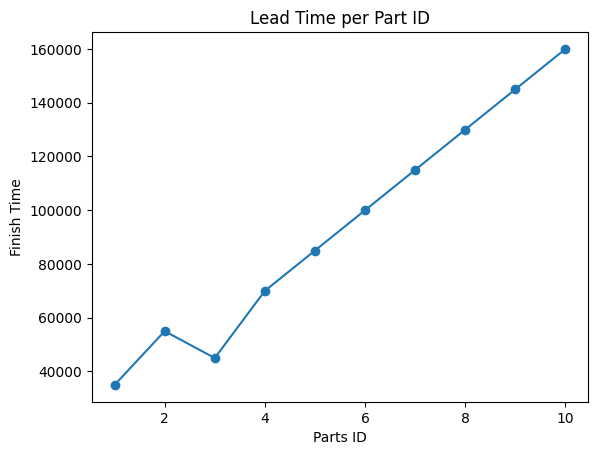

- Maximum Cycle Time: 55001
- Minimum Cycle Time: 35000
>>> Average system cycle time: 43500.0 [time unit]***


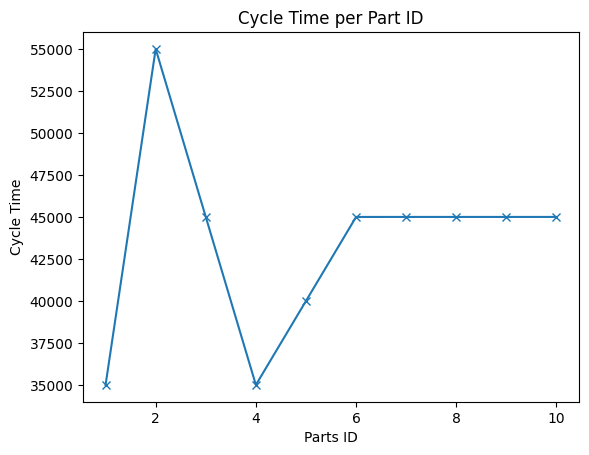

>>> System Throughput: 6.25e-05 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [75]:
digital_twin.run_digital_model()

Connect to the database

In [21]:
import sqlite3

conn = sqlite3.connect(database_path)
c = conn.cursor()

Execute an SQL query to select the unique Part IDs from the table:

In [42]:
part_ids = c.execute("SELECT DISTINCT part_id FROM digital_log").fetchall()
part_ids


[('Part 1',),
 ('Part 2',),
 ('Part 3',),
 ('Part 4',),
 ('Part 5',),
 ('Part 6',),
 ('Part 7',),
 ('Part 8',),
 ('Part 9',),
 ('Part 10',),
 ('Part 11',),
 ('Part 12',),
 ('Part 13',)]

For each Part ID, execute another SQL query to select the timestemp and status columns:

In [49]:
part_ids[0]

('Part 1',)

In [50]:
part_id = part_ids[0][0]
results = c.execute("SELECT timestamp, activity_type FROM digital_log WHERE part_id=?", part_ids[0]).fetchall()
results

[(0, 'Started'),
 (5000, 'Finished'),
 (5000, 'Started'),
 (20000, 'Finished'),
 (20000, 'Started'),
 (25000, 'Finished'),
 (25000, 'Started'),
 (35000, 'Finished')]

Example of the TDS dictionary
matrix_TDS = {

    "Part 1":[P1, P2, ..., Pn],

    "Part 2":[P1, P2, ..., Pm]
    
}

In [62]:
simtype = "TDS"
simtype = "qTDS"

conn = sqlite3.connect(database_path)
c = conn.cursor()

#--- TDS
part_ids = c.execute("SELECT DISTINCT part_id FROM digital_log").fetchall()
matrix_ptime_TDS = []
part_matrix_full_trace = []



for part_id in part_ids:
    part_full_trace = c.execute("SELECT timestamp, activity_type FROM digital_log WHERE part_id=?", part_id).fetchall()
    part_matrix_full_trace.append(part_full_trace)


    started_time = None
    finished_time = None
    processed_time = None
    part_trace = []

    for event in part_full_trace:
        #--- Extract the Started and Finished time
        if event[1] == 'Started':
            started_time = event[0]
        elif event[1] == 'Finished':
            finished_time = event[0]
        
        #--- Calculate the process time
        if started_time != None and finished_time != None:
            processed_time = finished_time - started_time

            #--- Add event process time to the part trace
            part_trace.append(processed_time)

            #--- reset local started and finished time for the next cycle
            started_time = None
            finished_time = None
            processed_time = None
    
    #--- Add part trace to the matrix of all parts traces
    matrix_ptime_TDS.append(part_trace)
    
matrix_ptime_TDS

[[5000, 15000, 5000, 10000],
 [5000, 15000, 5000, 10000],
 [5000, 15000, 5000, 10000],
 [5000, 15000, 5000, 10000],
 [5000, 15000, 5000, 10000],
 [5000, 15000, 5000, 10000],
 [5000, 15000, 5000, 10000],
 [5000, 15000, 5000, 10000],
 [5000, 15000, 5000, 10000],
 [5000, 15000, 5000, 10000],
 [5000, 15000],
 [5000],
 []]

In [60]:
part_ids

[('Part 1',),
 ('Part 2',),
 ('Part 3',),
 ('Part 4',),
 ('Part 5',),
 ('Part 6',),
 ('Part 7',),
 ('Part 8',),
 ('Part 9',),
 ('Part 10',),
 ('Part 11',),
 ('Part 12',),
 ('Part 13',)]

In [61]:
part_matrix_full_trace

[[(0, 'Started'),
  (5000, 'Finished'),
  (5000, 'Started'),
  (20000, 'Finished'),
  (20000, 'Started'),
  (25000, 'Finished'),
  (25000, 'Started'),
  (35000, 'Finished')],
 [(5000, 'Started'),
  (10000, 'Finished'),
  (20000, 'Started'),
  (35000, 'Finished'),
  (35000, 'Started'),
  (40000, 'Finished'),
  (45001, 'Started'),
  (55001, 'Finished')],
 [(10000, 'Started'),
  (15000, 'Finished'),
  (15000, 'Started'),
  (30000, 'Finished'),
  (30000, 'Started'),
  (35000, 'Finished'),
  (35001, 'Started'),
  (45001, 'Finished')],
 [(35000, 'Started'),
  (40000, 'Finished'),
  (40000, 'Started'),
  (55000, 'Finished'),
  (55000, 'Started'),
  (60000, 'Finished'),
  (60000, 'Started'),
  (70000, 'Finished')],
 [(45001, 'Started'),
  (50001, 'Finished'),
  (55000, 'Started'),
  (70000, 'Finished'),
  (70000, 'Started'),
  (75000, 'Finished'),
  (75000, 'Started'),
  (85000, 'Finished')],
 [(55001, 'Started'),
  (60001, 'Finished'),
  (70000, 'Started'),
  (85000, 'Finished'),
  (85000, 'S

### Generation of trace for qTDS

In [67]:
conn = sqlite3.connect(database_path)
c = conn.cursor()
#--- qTDS
machines_ids = c.execute("SELECT DISTINCT machine_id FROM digital_log").fetchall()
matrix_ptime_qTDS = []
machine_matrix_full_trace = []


for machine_id in machines_ids:
    machine_full_trace = c.execute("SELECT timestamp, activity_type FROM digital_log WHERE machine_id=?", machine_id).fetchall()
    machine_matrix_full_trace.append(machine_full_trace)


    started_time = None
    finished_time = None
    processed_time = None
    machine_trace = []

    for event in machine_full_trace:
        #--- Extract the Started and Finished time
        if event[1] == 'Started':
            started_time = event[0]
        elif event[1] == 'Finished':
            finished_time = event[0]
        
        #--- Calculate the process time
        if started_time != None and finished_time != None:
            processed_time = finished_time - started_time

            #--- Add event process time to the part trace
            machine_trace.append(processed_time)

            #--- reset local started and finished time for the next cycle
            started_time = None
            finished_time = None
            processed_time = None
    
    #--- Add part trace to the matrix of all parts traces
    matrix_ptime_qTDS.append(machine_trace)
    
matrix_ptime_qTDS

[[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
 [15000, 15000, 15000, 15000, 15000, 15000, 15000, 15000, 15000, 15000],
 [15000],
 [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
 [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]]

In [65]:
machines_ids

[('Machine 1',),
 ('Machine 2',),
 ('Machine 3',),
 ('Machine 4',),
 ('Machine 5',)]

## Output Event Trace Generation
Here we test how to generate the traces for the event output (Ys) that will be used in LCSS

Select every event from the table in sequence as tuples

In [5]:
import sqlite3
database_path = "databases/digital_model_5s_closed_no_shadow_real_db.db"
with sqlite3.connect(database_path) as digital_model_DB: 
    events_full_trace = digital_model_DB.execute("SELECT timestamp, machine_id, activity_type, part_id FROM digital_log").fetchall()
events_full_trace

[(0, 'Machine 1', 'Started', 'Part 1'),
 (5000, 'Machine 1', 'Finished', 'Part 1'),
 (5000, 'Machine 1', 'Started', 'Part 2'),
 (5000, 'Machine 2', 'Started', 'Part 1'),
 (10000, 'Machine 1', 'Finished', 'Part 2'),
 (10000, 'Machine 1', 'Started', 'Part 3'),
 (15000, 'Machine 1', 'Finished', 'Part 3'),
 (15000, 'Machine 1', 'Started', 'Part 4'),
 (15000, 'Machine 3', 'Started', 'Part 3'),
 (20000, 'Machine 2', 'Finished', 'Part 1'),
 (20000, 'Machine 2', 'Started', 'Part 2'),
 (20000, 'Machine 1', 'Finished', 'Part 4'),
 (20000, 'Machine 1', 'Started', 'Part 5'),
 (20000, 'Machine 4', 'Started', 'Part 1'),
 (25000, 'Machine 1', 'Finished', 'Part 5'),
 (25000, 'Machine 1', 'Started', 'Part 6'),
 (25000, 'Machine 4', 'Finished', 'Part 1'),
 (25000, 'Machine 5', 'Started', 'Part 1'),
 (30000, 'Machine 3', 'Finished', 'Part 3'),
 (30000, 'Machine 3', 'Started', 'Part 5'),
 (30000, 'Machine 1', 'Finished', 'Part 6'),
 (30000, 'Machine 1', 'Started', 'Part 7'),
 (30000, 'Machine 4', 'Started

Store the timestamp in a vector

In [7]:
time_sequence = []
for event in events_full_trace:
    time_sequence.append(event[0])
print("time_sequence: ", time_sequence)

time_sequence:  [0, 5000, 5000, 5000, 10000, 10000, 15000, 15000, 15000, 20000, 20000, 20000, 20000, 20000, 25000, 25000, 25000, 25000, 30000, 30000, 30000, 30000, 30000, 35000, 35000, 35000, 35000, 35000, 35000, 35000, 35001, 40000, 40000, 40000, 45000, 45000, 45000, 45000, 45000, 45001, 45001, 50000, 50000, 50000, 50000, 50000, 50000, 55000, 55000, 55000, 55001, 55001, 60000, 60000, 60000, 60000, 60000, 65000, 65000, 65000, 65000, 65000, 65001, 65001, 65001, 70000, 70001, 75000, 75000, 75000, 75001, 75001, 75001, 80000, 80000, 80000, 80000, 80001, 85000, 85001, 85001, 85001, 90000, 90000, 90000, 90001, 95000, 95000, 95000, 95000, 95001, 95001, 95001, 100000, 100001, 105000, 105000, 105000, 105001, 105001, 105001, 110000, 110000, 110000, 110000, 110001, 115000, 115001, 115001, 115001, 120000, 120000, 120000, 120001, 125000, 125000, 125000, 125000, 125001, 125001, 125001, 130000, 130001, 135000, 135000, 135000, 135001, 135001, 135001, 140000, 140000, 140000, 140000, 140001, 145000, 145

Create the string event and store in the vector of events

In [10]:
events_sequence = []
for event in events_full_trace:
    event_string = event[1] + " - " + event[2]
    events_sequence.append(event_string)
print("Event Sequence")
for event in events_sequence:
    print(event)

Event Sequence
Machine 1 - Started
Machine 1 - Finished
Machine 1 - Started
Machine 2 - Started
Machine 1 - Finished
Machine 1 - Started
Machine 1 - Finished
Machine 1 - Started
Machine 3 - Started
Machine 2 - Finished
Machine 2 - Started
Machine 1 - Finished
Machine 1 - Started
Machine 4 - Started
Machine 1 - Finished
Machine 1 - Started
Machine 4 - Finished
Machine 5 - Started
Machine 3 - Finished
Machine 3 - Started
Machine 1 - Finished
Machine 1 - Started
Machine 4 - Started
Machine 2 - Finished
Machine 2 - Started
Machine 5 - Finished
Machine 1 - Finished
Machine 1 - Started
Machine 4 - Finished
Machine 4 - Started
Machine 5 - Started
Machine 1 - Finished
Machine 1 - Started
Machine 4 - Finished
Machine 3 - Finished
Machine 3 - Started
Machine 1 - Finished
Machine 1 - Started
Machine 4 - Started
Machine 5 - Finished
Machine 5 - Started
Machine 2 - Finished
Machine 2 - Started
Machine 1 - Finished
Machine 1 - Started
Machine 4 - Finished
Machine 4 - Started
Machine 1 - Finished
Mac